#第4章 リストとタプル

##リスト
  多言語では、配列と呼ぶ
  ひとまとまりのデータをまとめて保持し、処理することができる。

In [1]:
a=[1,2,3]

In [2]:
a

[1, 2, 3]

In [3]:
a[0]

1

In [4]:
b=[[1,2],[3,4],5]

In [5]:
b[0]

[1, 2]

In [6]:
b[0][1]

2

In [7]:
[1,2]+[3,4,5]

[1, 2, 3, 4, 5]

In [8]:
c=[1,2]
c.append(3)
c

[1, 2, 3]

In [9]:
d=[]
e=[1,2]
d.append(e)
d.append(e)

In [10]:
d

[[1, 2], [1, 2]]

In [11]:
d[0][0]=4

In [12]:
d

[[4, 2], [4, 2]]

In [14]:
f=["A","B","C"]
for i in f:
  print(i)

A
B
C


## タプル
  複数の値の組を表現するデータ構造
  カンマで区切られた値で表現され、紛らわしい際は()を使用する

In [15]:
a=1,2,3
a

(1, 2, 3)

In [16]:
a[0]

1

In [17]:
(1,2)+(3,4)

(1, 2, 3, 4)

In [18]:
b=(1,2,3)
b[1]=4

TypeError: ignored

一度作成されたタプルは修正不可

In [19]:
def func():
  return 1,2

func()

(1, 2)

In [20]:
c,d=1,2
c
d

2

In [21]:
c

1

複数の変数を初期化できる

In [22]:
c,d=d,c

In [23]:
c

2

In [24]:
d

1

置換も可能

In [25]:
f=[(1,2),(3,4)]

In [26]:
f

[(1, 2), (3, 4)]

タプルのリストも可能

## Enumerate
  for i in a:とあった場合に、「要素の値」と「その要素が何番目なのか」という2つの情報が必要な際に使用することができる。

In [30]:
a=["A","B","C"]
for i,x in enumerate(a):
  print(i,x)

0 A
1 B
2 C


## リスト内表記
  [新しいリストの要素 for 元のリストの要素 in 元のリスト]という書き方ができる。
  


In [32]:
source=[0,1,2]
result=[]
for i in source:
  result.append(i*2)
result

[0, 2, 4]

In [34]:
source=[0,1,2]
result=[2*i for i in source]
result

[0, 2, 4]

## コッホ曲線
  コッホ曲線とは、以下の手順で作成される
1.   線分を用意する
2.   線分を3等分する
3.   中央の線分を正三角形の形に盛り上げる
  <br>というようにこれらを再帰することで成り立つ

### ライブラリのインポート

In [35]:
from math import sqrt
from PIL import Image, ImageDraw

### ベクトル和の長さ




In [36]:
def length(a):
  x,y=0,0
  for (dx, dy) in a:
    x+=dx
    y+=dy
  return sqrt(x**2+y**2)

### タプルからリストを作成

In [37]:
def convert(a,b):
  ax,ay=a
  alen=sqrt(ax**2+ay**2)
  c=ax/alen
  s=ay/alen
  scale=alen/length(b)
  b=[(scale*x,scale*y)for (x,y) in b]
  b=[(c*x-s*y,s*x+c*y)for (x,y) in b]
  return b


In [38]:
a=(0,1)
b=[(1,1),(1,-1)]
convert(a,b)

[(-0.5, 0.5), (0.5, 0.5)]

### タプルのリストそれぞれに適用

In [39]:
def apply(a,b):
  r=[]
  for i in a:
    r+=convert(i,b)
  return r

In [40]:
a=[(1,0),(0,-1)]
b=[(1,1),(1,-1)]
apply(a,b)

[(0.5, 0.5), (0.5, -0.5), (0.5, -0.5), (-0.5, -0.5)]

### 線の描画

In [41]:
def draw_line(draw,a,size):
  x1,y1=0,0
  for (dx,dy)in a:
    x2=x1+dx
    y2=y1+dy
    draw.line((x1,size/2-y1,x2,size/2-y2),fill=(255,255,255))
    x1,y1=x2,y2

### 画像の表示

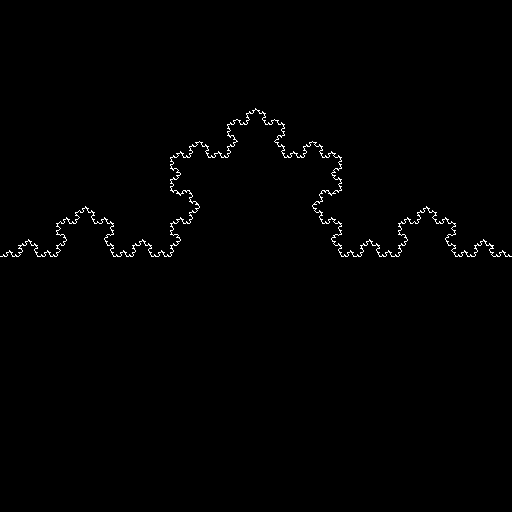

In [52]:
size=512
N=5
img=Image.new("RGB",(size,size))
draw=ImageDraw.Draw(img)
a=[(size,0)]
b=[(1,0),(0.5,sqrt(3.0)/2),(0.5,-sqrt(3.0)/2),(1,0)]
for _ in range(N):
  a=apply(a,b)
draw_line(draw,a,size)
img

## オリジナルのフラクタル曲線

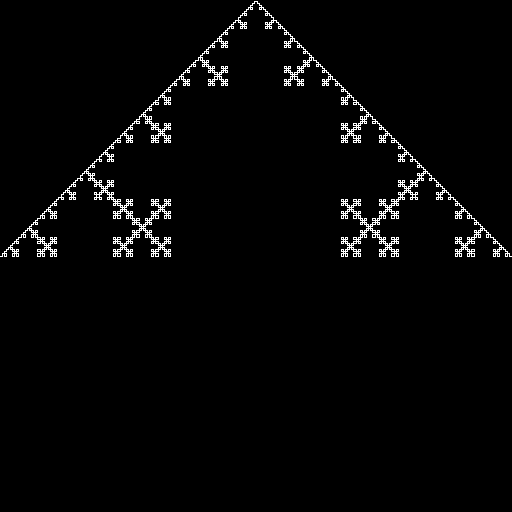

In [51]:
size=512
N=5
img=Image.new("RGB",(size,size))
draw=ImageDraw.Draw(img)
a=[(size,0)]
b=[(1,0),(0,1),(1,0),(0,-1),(1,0)]
for _ in range(N):
  a=apply(a,b)
draw_line(draw,a,size)
img

## 色付きフラクタル曲線


In [79]:
def draw_line_color(draw,a,colors,size):
  x1,y1=0,0
  for i,(dx,dy)in enumerate(a):
    x2=x1+dx
    y2=y1+dy
    c=colors[i%3]
    draw.line((x1,size/2-y1,x2,size/2-y2),fill=c)
    x1,y1=x2,y2

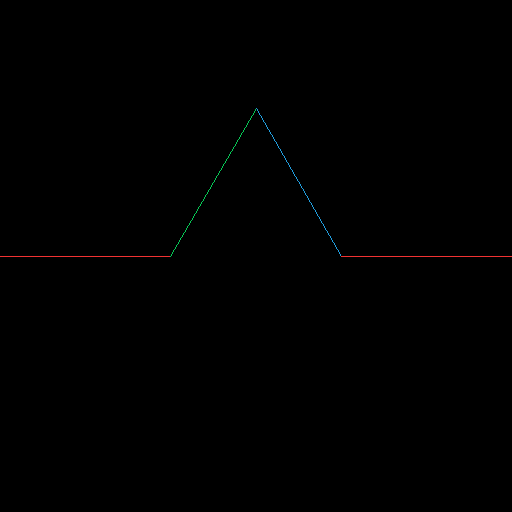

In [82]:
size=512
N=1
img=Image.new("RGB",(size,size))
draw=ImageDraw.Draw(img)
a=[(size,0)]
b=[(1,0),(0.5,sqrt(3.0)/2),(0.5,-sqrt(3.0)/2),(1,0)]
c=[(241,50,50),(6,199,85),(33,157,221)]
for _ in range(N):
  a=apply(a,b)
draw_line_color(draw,a,c,size)
img

## 内包表記

In [83]:
def convert(a,b):
  ax,ay=a
  alen=sqrt(ax**2+ay**2)
  c=ax/alen
  s=ay/alen
  scale=alen/length(b)
  b=[(scale*x,scale*y) for (x,y) in b]
  b=[(c*x-s*y,s*x+c*y) for (x,y) in b]
  return b

内包表記を行わない場合、以下のように記述される

```
r=[]
for (bx,by) in b:
  bx*=scale
  by*=scale
  nx=c*bx-s*by
  ny=s*bx+c*by
  r.append((nx,ny))
return r
```

